In [1]:
from benchmark import *
%matplotlib inline

In [4]:
def make_table(target_df, family_df):
    table = []

    target_df = target_df.sort_values(['family', 'glide_correct'], ascending=[True, False])
    for family in family_df.index.get_level_values('family'):
        family_level = family_df[family_df.index.get_level_values('family') == family].copy()
        target_level = target_df[target_df.index.get_level_values('family') == family].copy()
        
        family_level['protein'] = family

        # index
        family_level.reset_index(inplace=True)
        target_level.reset_index(inplace=True)
        family_level = family_level.set_index(['family', 'protein'])
        target_level = target_level.set_index(['family', 'protein'])
        table += [family_level]
        table += [target_level]
    table = pd.concat(table).filter(regex='correct').round(2)
    table.rename(columns={'combind_correct':'combind',
                          'glide_correct':'glide',
                          'best_correct':'best',
                          }, inplace=True)
    return table

def dumbell(table, drug=None, save=None):
    #table = table[~table.index.get_level_values('protein').isin(['MGLUR5', 'ELANE', 'GLUT1'])]
    f, ax = plt.subplots(figsize = (4, len(table)/4.5))

    last = None
    i = -1
    yticks = []
    for label, values in table[::-1].iterrows():
        if last != label[0]:
            i += 0.5
            last = label[0]

        if label[1] in drugs:
            i += 0.25

        i += 1
        yticks += [i]

        g, c, b = values[['glide','combind', 'best']]

        if label[1] in drugs:
            s = 50
            lw = 2
            alpha = 1
        else:
            s = 15
            lw = 1
            alpha = 1

        plt.scatter(c, i, c = 'g', s=s, alpha=alpha, lw=lw)
        plt.scatter(g, i, edgecolors = 'k', facecolors='none', s=s, alpha=alpha, lw=lw)
        plt.plot([g, c], [i, i], c ='grey', alpha=0.6)
        
    if drug is not None:
        i += 1.5
        yticks += [i]
        #yticklabels += ['Overall']
        c = drug['combind_correct'][0]
        g = drug['glide_correct'][0]
        plt.plot([g, c], [i, i], c ='grey', alpha=0.6)
        plt.scatter(c, i, c = 'g', s=70, lw=lw)
        plt.scatter(g, i, edgecolors = 'k', facecolors='none', s=70, lw=lw)

    plt.axvline(0.25, ls='--', c='grey', alpha=0.3)
    plt.axvline(0.5, ls='--', c='grey', alpha=0.3)
    plt.axvline(0.75, ls='--', c='grey', alpha=0.3)
    
    yticklabels = list(table.index.get_level_values(-1)[::-1]) + ['Overall']
    plt.yticks(yticks, yticklabels, fontsize = 12)
    plt.xlim(0, 1)
    plt.ylim(min(yticks)-1, max(yticks)+1)
    plt.tight_layout()
    if save:
        plt.savefig('../../pymol/figures/benchmark/{}.pdf'.format(save))
    plt.show()

def run(helpers, aggregate, method='standard', save=None, alpha=1.0):
    ligs = 0 if helpers == 'pdb' else 20
    data = get_data(helpers, 'sp', True)
    data = data[data.mcss < 0.5]

    ligand = data.xs((helpers, method, ligs, 'mcss_contact_hbond_sb', alpha),
                      level=('helpers', 'mode', 'n_ligs', 'features', 'alpha')).filter(regex='rmsd|correct')
    
    target = ligand.groupby(level=list(range(len(ligand.index.levels)-1))).mean().dropna()
    print(ligand.shape[0])
    if aggregate == 'target':
        family = target.groupby(level=list(range(len(target.index.levels)-1))).mean()
    elif aggregate == 'ligand':
        family = ligand.groupby(level=list(range(len(ligand.index.levels)-2))).mean()
    table = make_table(target, family)
    dumbell(table, drug_average(family), save)
    print(drug_average(family).filter(regex='correct'))
    return table

327


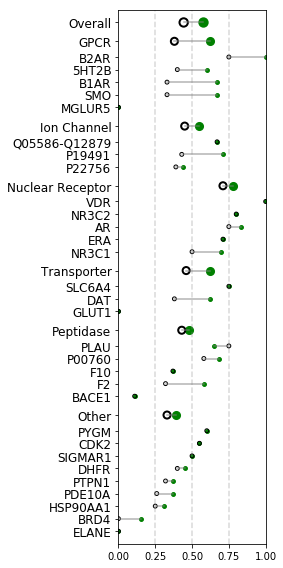

         combind_correct  glide_correct  best_correct
version                                              
sp              0.574956       0.443077      0.812536


combind  glide  best
family           protein                               
GPCR             GPCR                 0.62   0.38  0.86
                 B2AR                 1.00   0.75  1.00
                 5HT2B                0.60   0.40  1.00
                 B1AR                 0.67   0.33  1.00
                 SMO                  0.67   0.33  0.67
                 MGLUR5               0.00   0.00  0.33
Ion Channel      Ion Channel          0.55   0.45  0.81
                 Q05586-Q12879        0.67   0.67  0.67
                 P19491               0.71   0.43  0.86
                 P22756               0.44   0.39  0.83
Nuclear Receptor Nuclear Receptor     0.78   0.71  0.86
                 VDR                  1.00   1.00  1.00
                 NR3C2                0.80   0.80  0.90
                 AR                   0.83   0.75  0.83
                 ERA                  0.71   0.71  0.86
                 NR3C1                0.70   0.50  0.80
Transporter      Transporter          0.62   0.46  0.92
                 SLC6A4               0.75   0.75  1.00
                 DAT                  0.62   0.38  0.88
                 GLUT1                0.00   0.00  1.00
Peptidase        Peptidase            0.48   0.43  0.72
                 PLAU                 0.65   0.75  0.95
                 P00760               0.68   0.58  0.84
                 F10                  0.37   0.37  0.63
                 F2                   0.58   0.32  0.79
                 BACE1                0.11   0.11  0.37
Other            Other                0.39   0.33  0.70
                 PYGM                 0.60   0.60  0.80
                 CDK2                 0.55   0.55  0.85
                 SIGMAR1              0.50   0.50  0.75
                 DHFR                 0.45   0.40  0.75
                 PTPN1                0.37   0.32  0.42
                 PDE10A               0.37   0.26  0.89
                 HSP90AA1             0.31   0.25  0.62
                 BRD4                 0.15   0.00  0.54
                 ELANE                0.00   0.00  1.00

In [3]:
run('best_affinity_diverse', 'ligand')

248


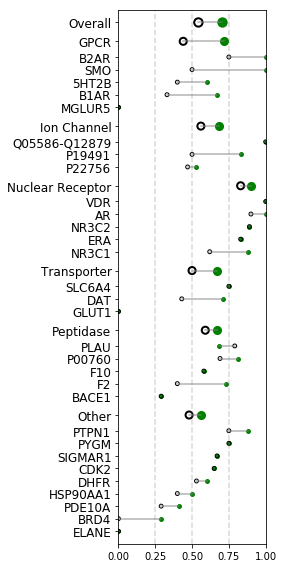

         combind_correct  glide_correct  best_correct
version                                              
sp              0.701186       0.543016           1.0


combind  glide  best
family           protein                               
GPCR             GPCR                 0.72   0.44   1.0
                 B2AR                 1.00   0.75   1.0
                 SMO                  1.00   0.50   1.0
                 5HT2B                0.60   0.40   1.0
                 B1AR                 0.67   0.33   1.0
                 MGLUR5               0.00   0.00   1.0
Ion Channel      Ion Channel          0.68   0.56   1.0
                 Q05586-Q12879        1.00   1.00   1.0
                 P19491               0.83   0.50   1.0
                 P22756               0.53   0.47   1.0
Nuclear Receptor Nuclear Receptor     0.90   0.83   1.0
                 VDR                  1.00   1.00   1.0
                 AR                   1.00   0.90   1.0
                 NR3C2                0.89   0.89   1.0
                 ERA                  0.83   0.83   1.0
                 NR3C1                0.88   0.62   1.0
Transporter      Transporter          0.67   0.50   1.0
                 SLC6A4               0.75   0.75   1.0
                 DAT                  0.71   0.43   1.0
                 GLUT1                0.00   0.00   1.0
Peptidase        Peptidase            0.67   0.59   1.0
                 PLAU                 0.68   0.79   1.0
                 P00760               0.81   0.69   1.0
                 F10                  0.58   0.58   1.0
                 F2                   0.73   0.40   1.0
                 BACE1                0.29   0.29   1.0
Other            Other                0.56   0.48   1.0
                 PTPN1                0.88   0.75   1.0
                 PYGM                 0.75   0.75   1.0
                 SIGMAR1              0.67   0.67   1.0
                 CDK2                 0.65   0.65   1.0
                 DHFR                 0.60   0.53   1.0
                 HSP90AA1             0.50   0.40   1.0
                 PDE10A               0.41   0.29   1.0
                 BRD4                 0.29   0.00   1.0
                 ELANE                0.00   0.00   1.0

In [5]:
run('best_affinity_diverse', 'ligand')

248


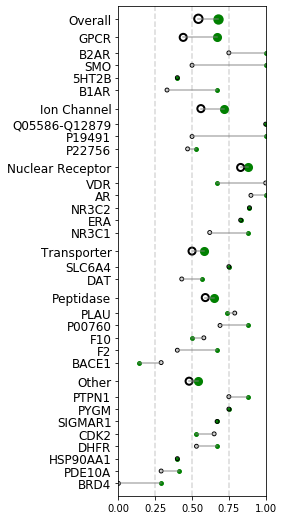

         combind_correct  glide_correct  best_correct
version                                              
sp              0.674366       0.543016           1.0


combind  glide  best
family           protein                               
GPCR             GPCR                 0.67   0.44   1.0
                 B2AR                 1.00   0.75   1.0
                 SMO                  1.00   0.50   1.0
                 5HT2B                0.40   0.40   1.0
                 B1AR                 0.67   0.33   1.0
                 MGLUR5               0.00   0.00   1.0
Ion Channel      Ion Channel          0.72   0.56   1.0
                 Q05586-Q12879        1.00   1.00   1.0
                 P19491               1.00   0.50   1.0
                 P22756               0.53   0.47   1.0
Nuclear Receptor Nuclear Receptor     0.88   0.83   1.0
                 VDR                  0.67   1.00   1.0
                 AR                   1.00   0.90   1.0
                 NR3C2                0.89   0.89   1.0
                 ERA                  0.83   0.83   1.0
                 NR3C1                0.88   0.62   1.0
Transporter      Transporter          0.58   0.50   1.0
                 SLC6A4               0.75   0.75   1.0
                 DAT                  0.57   0.43   1.0
                 GLUT1                0.00   0.00   1.0
Peptidase        Peptidase            0.65   0.59   1.0
                 PLAU                 0.74   0.79   1.0
                 P00760               0.88   0.69   1.0
                 F10                  0.50   0.58   1.0
                 F2                   0.67   0.40   1.0
                 BACE1                0.14   0.29   1.0
Other            Other                0.54   0.48   1.0
                 PTPN1                0.88   0.75   1.0
                 PYGM                 0.75   0.75   1.0
                 SIGMAR1              0.67   0.67   1.0
                 CDK2                 0.53   0.65   1.0
                 DHFR                 0.67   0.53   1.0
                 HSP90AA1             0.40   0.40   1.0
                 PDE10A               0.41   0.29   1.0
                 BRD4                 0.29   0.00   1.0
                 ELANE                0.00   0.00   1.0

In [4]:
run('best_mcss', 'ligand', save='best_mcss_benchmark')

248


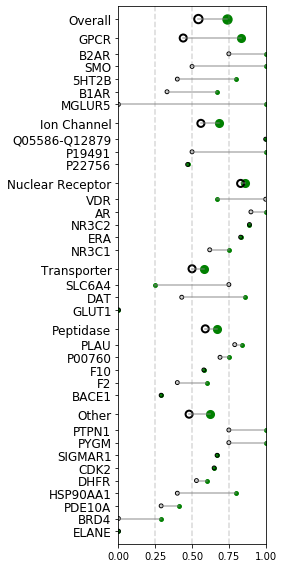

         combind_correct  glide_correct  best_correct
version                                              
sp              0.738425       0.543016           1.0


combind  glide  best
family           protein                               
GPCR             GPCR                 0.83   0.44   1.0
                 B2AR                 1.00   0.75   1.0
                 SMO                  1.00   0.50   1.0
                 5HT2B                0.80   0.40   1.0
                 B1AR                 0.67   0.33   1.0
                 MGLUR5               1.00   0.00   1.0
Ion Channel      Ion Channel          0.68   0.56   1.0
                 Q05586-Q12879        1.00   1.00   1.0
                 P19491               1.00   0.50   1.0
                 P22756               0.47   0.47   1.0
Nuclear Receptor Nuclear Receptor     0.86   0.83   1.0
                 VDR                  0.67   1.00   1.0
                 AR                   1.00   0.90   1.0
                 NR3C2                0.89   0.89   1.0
                 ERA                  0.83   0.83   1.0
                 NR3C1                0.75   0.62   1.0
Transporter      Transporter          0.58   0.50   1.0
                 SLC6A4               0.25   0.75   1.0
                 DAT                  0.86   0.43   1.0
                 GLUT1                0.00   0.00   1.0
Peptidase        Peptidase            0.67   0.59   1.0
                 PLAU                 0.84   0.79   1.0
                 P00760               0.75   0.69   1.0
                 F10                  0.58   0.58   1.0
                 F2                   0.60   0.40   1.0
                 BACE1                0.29   0.29   1.0
Other            Other                0.62   0.48   1.0
                 PTPN1                1.00   0.75   1.0
                 PYGM                 1.00   0.75   1.0
                 SIGMAR1              0.67   0.67   1.0
                 CDK2                 0.65   0.65   1.0
                 DHFR                 0.60   0.53   1.0
                 HSP90AA1             0.80   0.40   1.0
                 PDE10A               0.41   0.29   1.0
                 BRD4                 0.29   0.00   1.0
                 ELANE                0.00   0.00   1.0

In [3]:
run('pdb', 'ligand', save='pdb_benchmark')

248


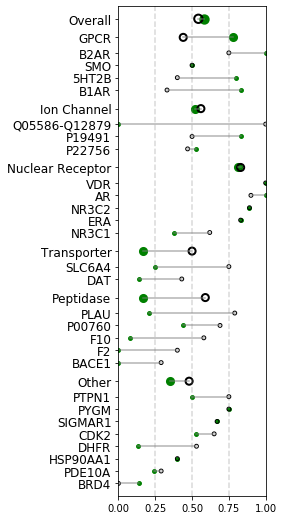

         combind_correct  glide_correct  best_correct
version                                              
sp              0.578016       0.543016           1.0


combind  glide  best
family           protein                               
GPCR             GPCR                 0.78   0.44   1.0
                 B2AR                 1.00   0.75   1.0
                 SMO                  0.50   0.50   1.0
                 5HT2B                0.80   0.40   1.0
                 B1AR                 0.83   0.33   1.0
                 MGLUR5               0.00   0.00   1.0
Ion Channel      Ion Channel          0.52   0.56   1.0
                 Q05586-Q12879        0.00   1.00   1.0
                 P19491               0.83   0.50   1.0
                 P22756               0.53   0.47   1.0
Nuclear Receptor Nuclear Receptor     0.81   0.83   1.0
                 VDR                  1.00   1.00   1.0
                 AR                   1.00   0.90   1.0
                 NR3C2                0.89   0.89   1.0
                 ERA                  0.83   0.83   1.0
                 NR3C1                0.38   0.62   1.0
Transporter      Transporter          0.17   0.50   1.0
                 SLC6A4               0.25   0.75   1.0
                 DAT                  0.14   0.43   1.0
                 GLUT1                0.00   0.00   1.0
Peptidase        Peptidase            0.17   0.59   1.0
                 PLAU                 0.21   0.79   1.0
                 P00760               0.44   0.69   1.0
                 F10                  0.08   0.58   1.0
                 F2                   0.00   0.40   1.0
                 BACE1                0.00   0.29   1.0
Other            Other                0.35   0.48   1.0
                 PTPN1                0.50   0.75   1.0
                 PYGM                 0.75   0.75   1.0
                 SIGMAR1              0.67   0.67   1.0
                 CDK2                 0.53   0.65   1.0
                 DHFR                 0.13   0.53   1.0
                 HSP90AA1             0.40   0.40   1.0
                 PDE10A               0.24   0.29   1.0
                 BRD4                 0.14   0.00   1.0
                 ELANE                0.00   0.00   1.0

In [6]:
run('best_affinity_diverse', 'ligand', save='no-gscore-best_affinity_diverse_benchmark', alpha=0.0)

248


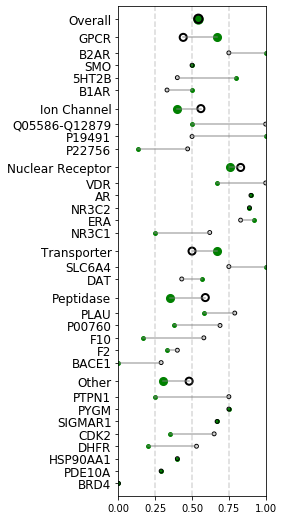

         combind_correct  glide_correct  best_correct
version                                              
sp              0.541128       0.543016           1.0


combind  glide  best
family           protein                               
GPCR             GPCR                 0.67   0.44   1.0
                 B2AR                 1.00   0.75   1.0
                 SMO                  0.50   0.50   1.0
                 5HT2B                0.80   0.40   1.0
                 B1AR                 0.50   0.33   1.0
                 MGLUR5               0.00   0.00   1.0
Ion Channel      Ion Channel          0.40   0.56   1.0
                 Q05586-Q12879        0.50   1.00   1.0
                 P19491               1.00   0.50   1.0
                 P22756               0.13   0.47   1.0
Nuclear Receptor Nuclear Receptor     0.76   0.83   1.0
                 VDR                  0.67   1.00   1.0
                 AR                   0.90   0.90   1.0
                 NR3C2                0.89   0.89   1.0
                 ERA                  0.92   0.83   1.0
                 NR3C1                0.25   0.62   1.0
Transporter      Transporter          0.67   0.50   1.0
                 SLC6A4               1.00   0.75   1.0
                 DAT                  0.57   0.43   1.0
                 GLUT1                0.00   0.00   1.0
Peptidase        Peptidase            0.35   0.59   1.0
                 PLAU                 0.58   0.79   1.0
                 P00760               0.38   0.69   1.0
                 F10                  0.17   0.58   1.0
                 F2                   0.33   0.40   1.0
                 BACE1                0.00   0.29   1.0
Other            Other                0.30   0.48   1.0
                 PTPN1                0.25   0.75   1.0
                 PYGM                 0.75   0.75   1.0
                 SIGMAR1              0.67   0.67   1.0
                 CDK2                 0.35   0.65   1.0
                 DHFR                 0.20   0.53   1.0
                 HSP90AA1             0.40   0.40   1.0
                 PDE10A               0.29   0.29   1.0
                 BRD4                 0.00   0.00   1.0
                 ELANE                0.00   0.00   1.0

In [7]:
run('best_mcss', 'ligand', save='no-gscore-best_mcss_benchmark', alpha=0.0)